<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/examples/unsupervised/stacked_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
tf.random.set_seed(1)

In [30]:
print(tf.__version__)

2.1.0


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class Encoder(layers.Layer):
  def __init__(self, units):  
    super(Encoder, self).__init__()
    self.layers = [layers.Dense(units=u, activation=tf.nn.relu) for u in units]
  def call(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [0]:
class Decoder(layers.Layer):
  def __init__(self, units):
    super(Decoder, self).__init__(units)
    self.layers = [layers.Dense(units=u, activation=tf.nn.relu) for u in units]
  def call(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [0]:
class Autoencoder(tf.keras.Model):
  def __init__(self, encoder_units, decoder_units):
    super(Autoencoder, self).__init__()
    self.encoder = Encoder(encoder_units)
    self.decoder = Decoder(decoder_units)
  def call(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [0]:
(X_train, Y_train), (X_test, Y_test) =  tf.keras.datasets.mnist.load_data()
X_train = X_train/ 255
X_test = X_test/ 255
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2])).astype(np.float32)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2])).astype(np.float32)

In [0]:
autoencoder = Autoencoder([X_train.shape[1], 1000, 500, 250, 2], [250, 500, 1000, X_train.shape[1]])

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

In [38]:
autoencoder.build(X_train.shape)
autoencoder.summary()

Model: "autoencoder_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_2 (Encoder)          multiple                  2026692   
_________________________________________________________________
decoder_1 (Decoder)          multiple                  1412034   
Total params: 3,438,726
Trainable params: 3,438,726
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 431us/sample - loss: 0.0644
Epoch 2/20
60000/60000 [==============================] - 25s 425us/sample - loss: 0.0508
Epoch 3/20
60000/60000 [==============================] - 25s 423us/sample - loss: 0.0458
Epoch 4/20
60000/60000 [==============================] - 25s 422us/sample - loss: 0.0432
Epoch 5/20
60000/60000 [==============================] - 26s 425us/sample - loss: 0.0421
Epoch 6/20
60000/60000 [==============================] - 26s 430us/sample - loss: 0.0414
Epoch 7/20
60000/60000 [==============================] - 26s 427us/sample - loss: 0.0405
Epoch 8/20
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0404
Epoch 9/20
60000/60000 [==============================] - 25s 424us/sample - loss: 0.0396
Epoch 10/20
60000/60000 [==============================] - 26s 427us/sample - loss: 0.0391
Epoch 11/20
60000/60000 [==============================] - 26s 425us/sample 

In [0]:
X_decoded = autoencoder.predict(X_test)

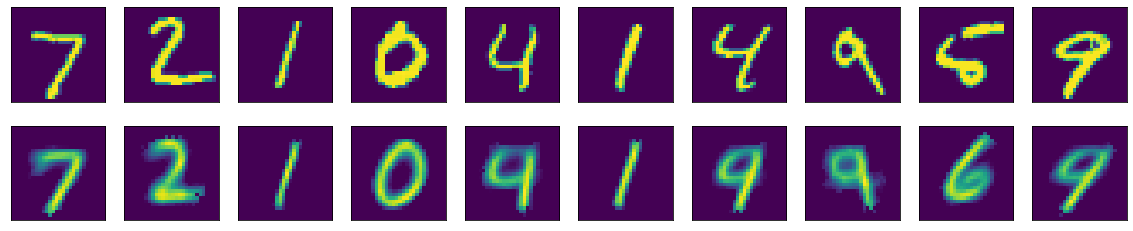

In [41]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='viridis')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_decoded[i].reshape(28, 28), cmap='viridis')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
encoded = autoencoder.encoder(X_train)

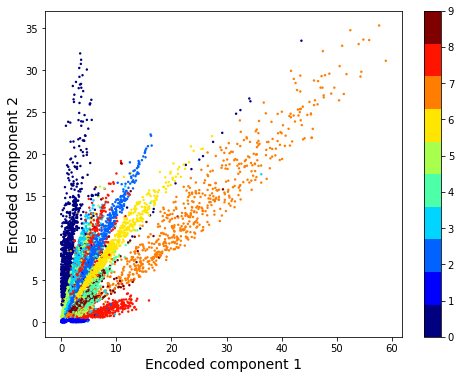

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(encoded[:10000, 0], encoded[:10000, 1], c=Y_train[:10000], edgecolor='none', alpha=1.0,
           cmap=plt.get_cmap('jet', 10), s=6)
plt.colorbar()
plt.xlabel('Encoded component 1', fontsize=14)
plt.ylabel('Encoded component 2', fontsize=14)
plt.show()